### Question 1: Explain and implement random sampling. [LVL1]

Random sampling is the most basic form of sampling where each element has an equal chance of being selected.



In [8]:
import typing as tp
import random
import math

def sample(arr: tp.List) -> tp.Any:
    if not arr:
        raise ValueError("Cannot sample from an empty list")
    n = len(arr)
    x = random.random() * n
    idx = math.floor(x)  # Alternatively, idx = int(x) also works
    return arr[idx]

'green'

### Question 2: Stratified Sampling

You are given a list of elements, each associated with a category (or stratum). 
Your task is to implement a function that performs stratified sampling, which 
ensures that the sample contains elements from each category in proportion to 
their occurrence in the input list.


In [24]:

def binary_search(arr: tp.List[int], target: float) -> int:
    """Custom binary search to find the leftmost insertion point."""
    low, high = 0, len(arr)
    while low < high:
        mid = (low + high) // 2
        if arr[mid] < target:
            low = mid + 1
        else:
            high = mid
    return low

def stratified_sampling(arr:tp.List,num_samples: int) -> tp.List:
    assert len(arr) >= 1, "Empty list of categories"
    assert num_samples >=1, "num_samples should be a strictly positive int"

    cumsum = 0
    idx_arr = []
    for cat,val in arr:
        cumsum += val
        idx_arr.append(cumsum)
    

    samples = []

    for _ in range(num_samples):
        x = int(random.random() * cumsum)
        idx = binary_search(idx_arr,x)
        samples.append(arr[idx][0])
    return samples

arr = [
    ("apple", 1), ("banana", 1), ("cherry", 2), ("date", 2), 
    ("elderberry", 3), ("fig", 3), ("grape", 3)
]
num_samples = 10
stratified_sampling(arr,num_samples)

['apple',
 'apple',
 'elderberry',
 'grape',
 'fig',
 'fig',
 'elderberry',
 'apple',
 'fig',
 'elderberry']

## Reservoir sampling

You are given a stream of elements that you need to sample from. The stream is potentially infinite, and you are required to implement a function that randomly selects k elements from this stream. The selected elements should have equal probability of being chosen, regardless of the stream's length.

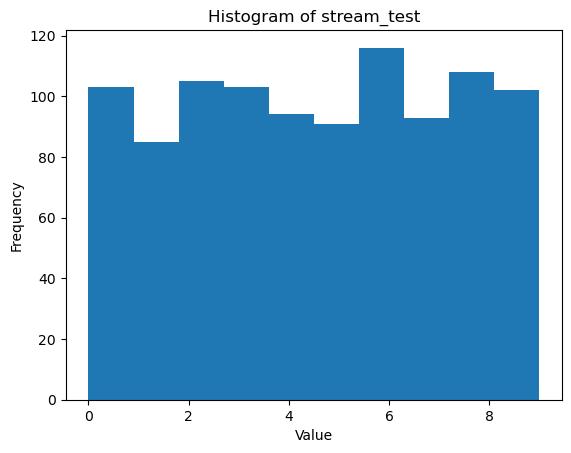

In [45]:
import random 
import typing as tp


def reservoir_sampling(stream: tp.Iterable[tp.Any], k: int) -> tp.List[tp.Any]:
    count = 0
    samples = []
    while True:
        
        # operating on the stream until there is no more element inside it
        try:
            new_candidate = next(stream)
        except:
            return samples
        
        # simple first case : no choice until we have k elements
        if count < k:
            samples.append(new_candidate)

        # then we want to iteratively challenge all the chosen samples by an updated probability
        # chances of being chosen is k/n but we don't have access to n. 
        # so we give k / current_length chance and it will be compounded by the chance of kicked of the list after
        else:
            x = int(random.random() * (count + 1))
            if x < k:
                samples[x] = new_candidate

        # then we update the moving length in any case
        count += 1 

a = 0
b = 9
n = 100_000
stream_test = (random.randint(a, b) for _ in range(n))

samples = reservoir_sampling(stream_test,1000)

import matplotlib.pyplot as plt

plt.hist(samples, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of stream_test')
plt.show()

Total reward after 1000 trials: 721


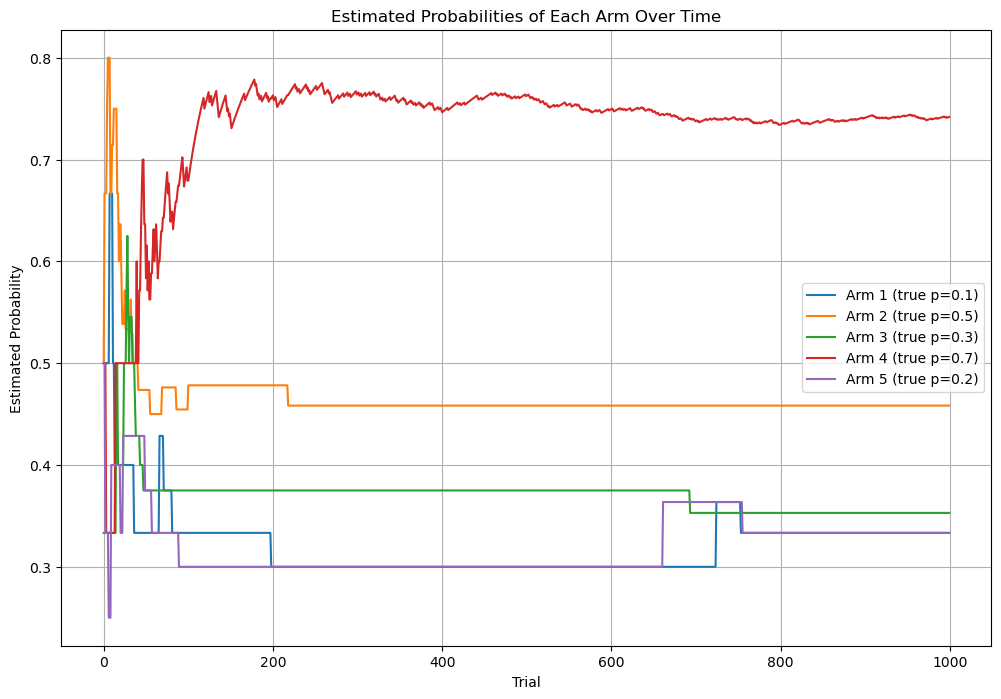

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms and true probabilities
k = 5
true_probabilities = [0.1, 0.5, 0.3, 0.7, 0.2]

# Number of trials
N = 1000

# Initialize alpha and beta parameters for the Beta distributions
alpha = np.ones(k)
beta = np.ones(k)

# Function to simulate pulling an arm
def pull_arm(prob):
    return np.random.rand() < prob

# Thompson Sampling algorithm
total_reward = 0
estimated_probabilities = np.zeros((N, k))

for t in range(N):
    # Sample from the Beta distribution for each arm
    samples = np.random.beta(alpha, beta)
    
    # Select the arm with the highest sample
    selected_arm = np.argmax(samples)
    
    # Pull the selected arm and observe the reward
    reward = pull_arm(true_probabilities[selected_arm])
    
    # Update alpha and beta based on the observed reward
    if reward == 1:
        alpha[selected_arm] += 1
    else:
        beta[selected_arm] += 1
    
    # Update the total reward
    total_reward += reward
    
    # Store the estimated probabilities for plotting
    estimated_probabilities[t] = alpha / (alpha + beta)

# Print the total reward obtained
print(f"Total reward after {N} trials: {total_reward}")

# Plot the estimated probabilities over time
plt.figure(figsize=(12, 8))
for i in range(k):
    plt.plot(estimated_probabilities[:, i], label=f'Arm {i+1} (true p={true_probabilities[i]})')
plt.xlabel('Trial')
plt.ylabel('Estimated Probability')
plt.title('Estimated Probabilities of Each Arm Over Time')
plt.legend()
plt.grid(True)
plt.show()
